# LeNet-5
In this homework you will use PyTorch to build and train a convolutional network. You are asked to implement the a modified LeNet-5 for MINIST digits classification. Different from the original LeNet-5, in this notebook we use max instead of average pooling, and use fully connected instead of gaussian final layer.

In [0]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.nn import functional
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import time
from IPython import display

In [0]:
# grayscale and inline plotting
%matplotlib inline
plt.rcParams['image.cmap'] = 'gray'

### Use ReLU activation and change C5 to F5
Now let's implement a varant of LeNet-5, use `ReLU` activation function instead of `tanh` activation function for each layer. And change the convolutional layer C5 in the original net work to a fully connected layer F5. You will have to use softmax as the network output. 

In [0]:
class LeNet5_Relu(nn.Module):

    # definition of each neural network layer
    def __init__(self):
        super(LeNet5_Relu, self).__init__()
        self.C1 = nn.Conv2d(1, 6, kernel_size=(5, 5))
        self.S2 = nn.MaxPool2d(kernel_size=(2, 2), stride=2)
        self.C3 = nn.Conv2d(6, 16, kernel_size=(5, 5))
        self.S4 = nn.MaxPool2d(kernel_size=(2, 2), stride=2)
        
        ####### Complete the defition of F5 #################
        
        #self.C5 = nn.Conv2d(16,120,kernel_size=(5,5))
        self.F5 = nn.Linear(400,120)

        #####################################################

        self.F6 = nn.Linear(120, 84)

        # output layer
        self.OL = nn.Linear(84, 10)
        
        # record C5 & C6 activation for visualization
        self.record = {"F5":self.F5, "F6":self.F6}

    # definition of the forward pass
    def forward(self, x):
        
        ####### Complete the foward pass C1 >> F5 ##########
        x = torch.relu(self.C1(x))
        x = self.S2(x)
        x = torch.relu(self.C3(x))
        x = self.S4(x)
        x = x.view(x.size(0), -1)
        x = torch.relu(self.F5(x))
        
        
        

        #####################################################

        #x = x.view(x.size(0), -1)
        self.record["F5"] = x.clone().detach().numpy()
        

        x = torch.relu(self.F6(x))
        self.record["F6"] = x.clone().detach().numpy()
        x = functional.softmax(self.OL(x), dim=1)
        
        return x

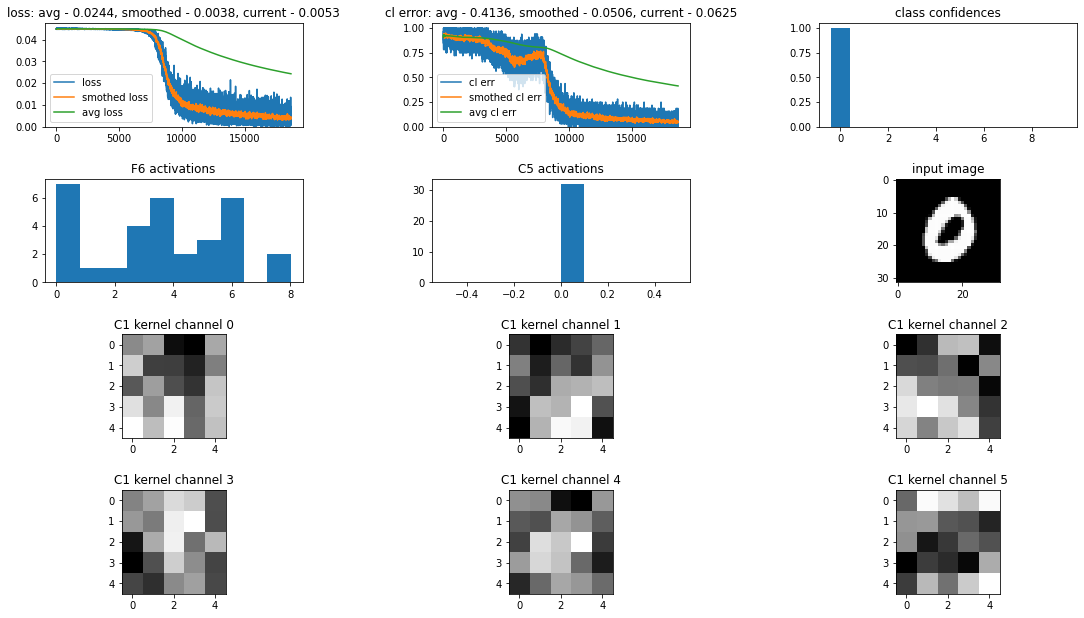

2.9907705783843994 seconds per 100 iterations


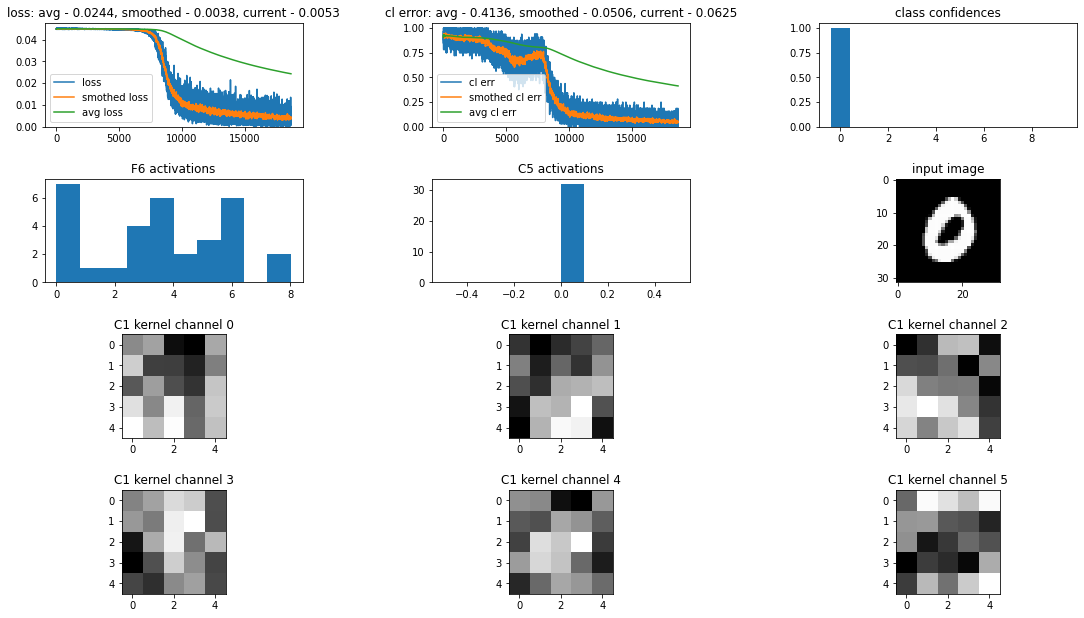

In [0]:
ntrain = trainimages.shape[0];  # number of training examples
nepoch = 10;                    # number of epochs through training set
disp_freq = 100                 # display frequency
batchsize = 32                  # minibatch size

errs = []
losses = []

lenet5 = LeNet5_Relu()

# use SGD optimizer, set learning rate parameter as 0.1
optimizer = optim.SGD(lenet5.parameters(), lr=0.1)



t_start = time.time()
for iepoch in range(nepoch):
    for t in range(int(ntrain / batchsize)):
        batchindices = np.random.choice(ntrain, batchsize, replace=False)
        trainlabels_iter = trainlabels[batchindices]
        
        # label 1 for the correct digit and -1 for the incorrect digits
        y = torch.ones(10, batchsize) * (0)
        y[trainlabels_iter, torch.arange(batchsize, dtype=torch.int64)] = 1

        # normalize input images
        imgs = torch.zeros([batchsize, 1, 32, 32])
        imgs[:, 0, 2: -2, 2: -2] = trainimages[batchindices].float() / 255.

        # before the forward pass, clean the gradient buffers of all parameters
        optimizer.zero_grad()

        # forward pass
        out = lenet5(imgs)
        
        # MSE loss
        loss = torch.mean(0.5*(y - out.t())**2)
        
        
        #loss = criterion(out.t())

        # backward pass
        loss.backward()

        # update parameters using SGD
        optimizer.step()

        # calculate error rate and loss for plot
        pred = torch.argmax(out, dim=1)
        err = torch.mean((pred != trainlabels_iter).float())
        errs.append(err.detach().numpy())
        losses.append(loss.detach().numpy())

        
        # plots
        if (t + 1) % disp_freq == 0:
            plt.gcf().clear()
            visualize(len(errs) - 1, losses, errs, out[0,:].detach(), lenet5.record["F6"][:, 0], 
                      lenet5.record["F5"][:, 0], imgs[0, 0].detach(), lenet5.C1.weight.detach().squeeze())
            print(str(time.time() - t_start) + " seconds per " + str(disp_freq) + " iterations")
            t_start = time.time()
            time.sleep(0.01)